In [31]:
# Common
import os
import numpy as np
import tensorflow as tf
import pandas as pd
import cv2
import random

# Data Splite
from sklearn.model_selection import train_test_split

# Models 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.utils import np_utils
import sklearn.metrics as metrics


# Plot
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [15]:
IMG_WIDTH=28
IMG_HEIGHT=28
img_folder=r'C:\Users\16645\Desktop\HWR\monkbrill2'

In [16]:
def create_dataset(img_folder):
   
    img_data_array= []
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread(image_path, -1)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r'C:\Users\16645\Desktop\HWR\monkbrill2')

In [17]:
x = np.array(img_data, np.float32)

In [18]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'Alef': 0,
 'Ayin': 1,
 'Bet': 2,
 'Dalet': 3,
 'Gimel': 4,
 'He': 5,
 'Het': 6,
 'Kaf': 7,
 'Kaf-final': 8,
 'Lamed': 9,
 'Mem': 10,
 'Mem-medial': 11,
 'Nun-final': 12,
 'Nun-medial': 13,
 'Pe': 14,
 'Pe-final': 15,
 'Qof': 16,
 'Resh': 17,
 'Samekh': 18,
 'Shin': 19,
 'Taw': 20,
 'Tet': 21,
 'Tsadi-final': 22,
 'Tsadi-medial': 23,
 'Waw': 24,
 'Yod': 25,
 'Zayin': 26}

In [19]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [47]:
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D())

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=27, activation = 'softmax'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 6)         60        
                                                                 
 average_pooling2d_2 (Averag  (None, 13, 13, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.9) #90/10 split

In [49]:
from keras.utils.np_utils import *
y = to_categorical(target_val)
history = model.fit(x = X_train, y = y_train, batch_size=128, epochs=30, validation_data=(X_test, y_test),verbose = 2 )


Epoch 1/30
39/39 - 2s - loss: 2.4545 - accuracy: 0.3994 - val_loss: 1.3809 - val_accuracy: 0.7148 - 2s/epoch - 61ms/step
Epoch 2/30
39/39 - 1s - loss: 1.0092 - accuracy: 0.7560 - val_loss: 0.8427 - val_accuracy: 0.7798 - 963ms/epoch - 25ms/step
Epoch 3/30
39/39 - 1s - loss: 0.7025 - accuracy: 0.8075 - val_loss: 0.6992 - val_accuracy: 0.8051 - 973ms/epoch - 25ms/step
Epoch 4/30
39/39 - 1s - loss: 0.5925 - accuracy: 0.8366 - val_loss: 0.6202 - val_accuracy: 0.8357 - 981ms/epoch - 25ms/step
Epoch 5/30
39/39 - 1s - loss: 0.5029 - accuracy: 0.8629 - val_loss: 0.5327 - val_accuracy: 0.8321 - 967ms/epoch - 25ms/step
Epoch 6/30
39/39 - 1s - loss: 0.4442 - accuracy: 0.8736 - val_loss: 0.4879 - val_accuracy: 0.8718 - 976ms/epoch - 25ms/step
Epoch 7/30
39/39 - 1s - loss: 0.3841 - accuracy: 0.8934 - val_loss: 0.4409 - val_accuracy: 0.8863 - 975ms/epoch - 25ms/step
Epoch 8/30
39/39 - 1s - loss: 0.3521 - accuracy: 0.8991 - val_loss: 0.4126 - val_accuracy: 0.8809 - 979ms/epoch - 25ms/step
Epoch 9/30


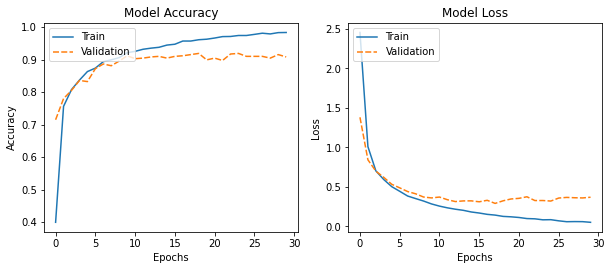

In [50]:
#Get Train/Validation -> accuracy and loss values for previous model trained
accuracies = [model.history.history['accuracy'],model.history.history['val_accuracy']]
losses = [model.history.history['loss'],model.history.history['val_loss']]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(10,4))
sns.lineplot(data=accuracies, ax=ax1)
sns.lineplot(data=losses, ax=ax2)
ax1.set(title = 'Model Accuracy', xlabel='Epochs', ylabel='Accuracy')
ax2.set(title = 'Model Loss', xlabel='Epochs', ylabel='Loss')
ax1.legend(['Train', 'Validation'], loc='upper left')
ax2.legend(['Train', 'Validation'], loc='upper left')
fig.subplots_adjust(top=0.85)

In [54]:
# Model accuracy on Test Set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")
print(y_test)

18/18 [==============================] - 0s 5ms/step - loss: 0.3691 - accuracy: 0.9079
Test loss: 0.36906594038009644
Test accuracy: 0.9079422354698181
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [55]:
preds = model.predict(X_test)
#Convert probabilities to class labels
pred_classes = tf.argmax(preds, axis=1)
y_test_classes = tf.argmax(y_test, axis=1)

In [57]:
print(pred_classes)
print(y_test_classes)

tf.Tensor(
[12  1 13  6 18  7  4 12  7  6 11 23 18 10  4  3 13  0 22  1 20  5  2  2
 18 23  1  9  4 19 24 24 21 23  4 18  9 16  3  5 22  5  6  5 23 12 18 20
 21  9 13  4 11 23 14  0 18 22 16  2  7  4 13 11  0 13 16 13 20 19 18 11
 10 16  5 24 16 19  6 13  3 16 20 19  4 21  2 20  4  1 23  1  3  3 18 12
 24 11  9 11 19 10 16 20 12 13 19  7  0 20 11 21 20  6 13 21  6 23  5  4
 11 18 13  0  9 11 18 23 17 16  0 20  2 20  9 19  6 16 10 20  6 18 21  7
 19  4 18 15 19  7 11 20 22 16 18 11 13 17  6  0 18 18  1 11 19  0 11 11
  6 16 10 22 21  6  0 10  9  9 13  6  4  2 10 18  4 26 18  5  0  9  4 11
  7  4  1 19  6 20 13 13  0 10 24  2  9 10 19  2  5 10 22  5  2 13  9  7
 23  2 20 10 20 13 19 16  2 23 16 19  6  4 11 10 11 11  4  3  9  0 24 16
 10 18 18 23 13  4 19  9  9 23  7 21  2 11  1 18  7  1 18 24 16 16 16  1
  6  6  2  5  5  4  2 11 20  6 19  7  3  5 22  4 11  5  0  2  7 21  2 19
 10 13  2  6 13 11  7 11  2 14 14 21 11  9 13 19  5 23  6  1  1  1  2  4
  5  4 23  9  2  9  1 10 21 21  5 18 23 

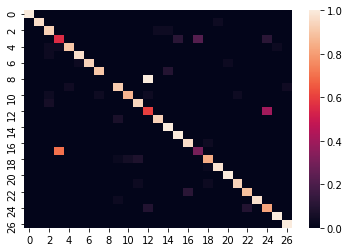

In [71]:
#Plot confusion Matrix
cm = confusion_matrix(y_test_classes, pred_classes)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
f = sns.heatmap(cm, annot=False, fmt='.2f')

In [69]:
s1 = f.get_figure()
s1.savefig('HeatMap.jpg',dpi=100)